In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [154]:
df = pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [155]:
df.shape

(10000, 14)

In [156]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [157]:
# dropping irrelevent columns
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [158]:
# #One hot encoding for categorical data
# df = pd.get_dummies(data=df,drop_first=True)
# bool_cols = df.select_dtypes(include=['bool']).columns
# df[bool_cols] = df[bool_cols].astype(int)
# df.head()

In [159]:
df.shape

(10000, 11)

In [160]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [161]:
df.duplicated().sum()

0

In [162]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: title={'center': 'Correlated with Exited Column'}>

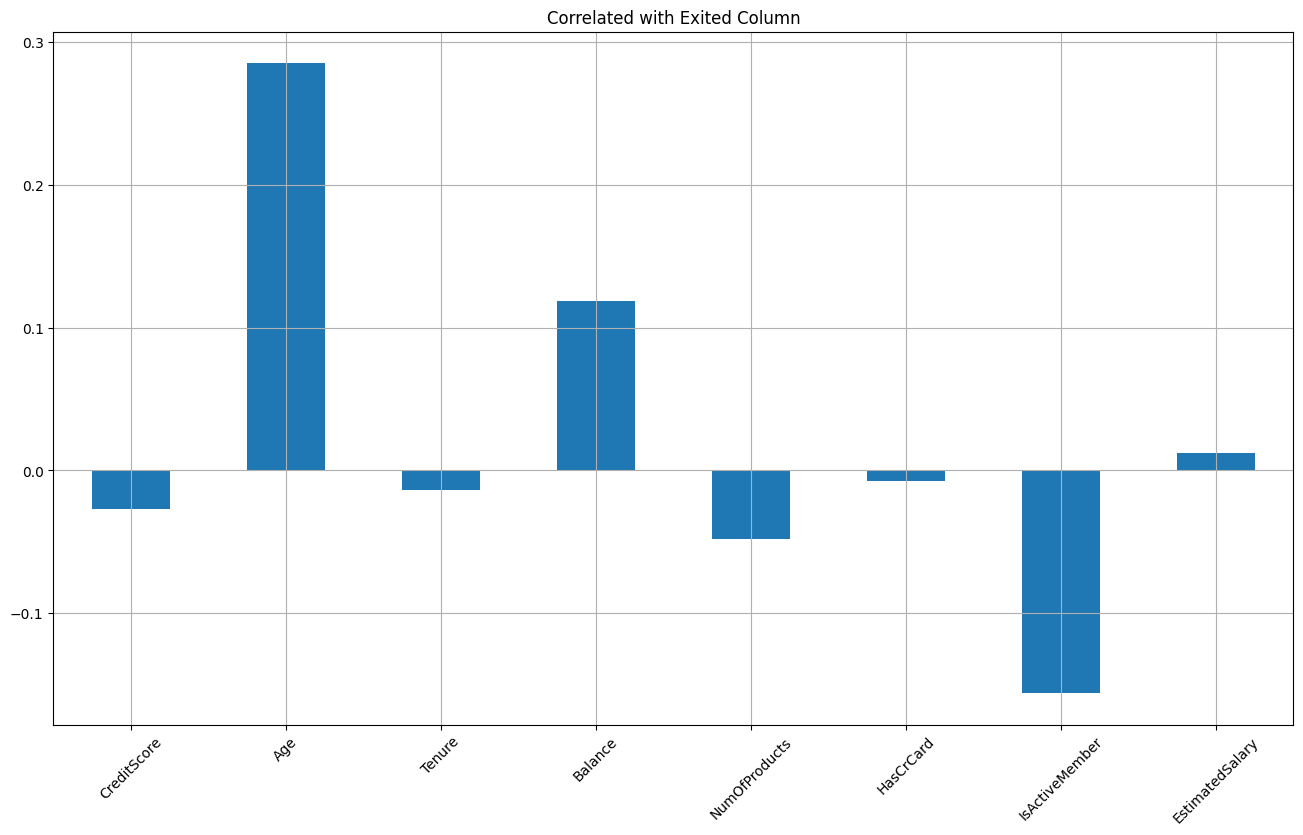

In [163]:
import matplotlib.pyplot as plt
dataset_2 = df.drop(['Exited','Gender','Geography'], axis=1)
dataset_2.corrwith(df['Exited']).plot.bar(figsize=(16,9), title='Correlated with Exited Column', rot = 45,grid = True)

<Axes: >

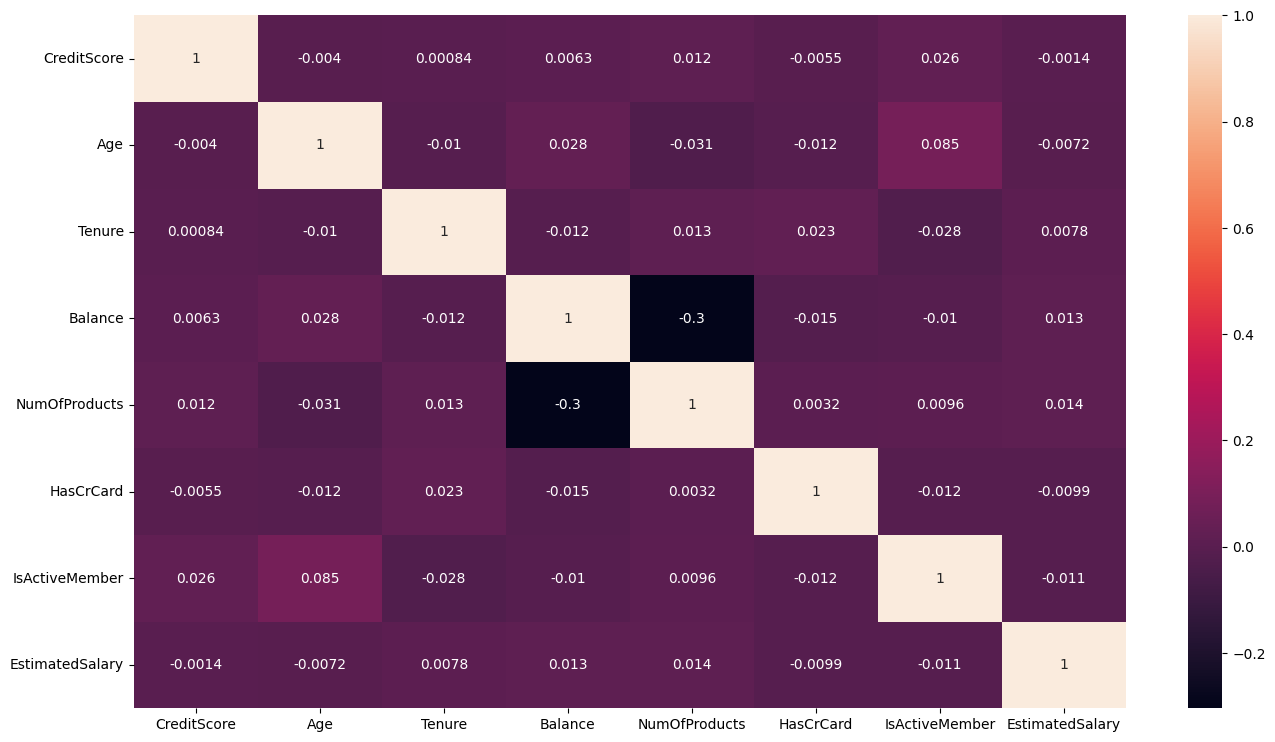

In [164]:
import seaborn as sns
corr = dataset_2.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

In [165]:
X= df.drop(columns='Exited')
y= df['Exited']

In [166]:
# Define categorical and numerical features
categorical_features = ['Gender', 'Geography']
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [167]:
from sklearn.pipeline import Pipeline
# Preprocessing pipeline
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True))  # Add polynomial features
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

In [168]:
# Full pipeline with Random Forest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [308]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [ ]:
# Train the model
pipeline.fit(X_train, y_train)

In [ ]:
# from imblearn.combine import SMOTEENN
# sm = SMOTEENN(random_state=42)
# X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)

In [ ]:
# # Feature selection
# from sklearn.feature_selection import RFE
# selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=10, step=1)
# selector.fit(X_train_scaled, y_train)
# X_train_selected = selector.transform(X_train_scaled)
# X_test_selected = selector.transform(X_test_scaled)

In [ ]:
# # Apply PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95)  # Retain 95% of the variance
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# # Hyperparameter tuning
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10, 20],
#     'min_samples_leaf': [1, 2, 5, 10],
#     'bootstrap': [True, False]
# }

# rf = RandomForestClassifier(random_state=42)
# rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# rf_random.fit(X_train_scaled, y_train)

# # Best estimator
# best_rf = rf_random.best_estimator_

# # Make predictions and evaluate
# predictions = best_rf.predict(X_test_scaled)
# print(f"Best Parameters: {rf_random.best_params_}")
# print(f"Accuracy: {accuracy_score(y_test, predictions)}")
# print(f"F1 Score: {f1_score(y_test, predictions)}")
# print(f"Precision: {precision_score(y_test, predictions)}")
# print(f"Recall: {recall_score(y_test, predictions)}")


In [ ]:
import pickle
pickle.dump(pipeline,open('model_pipeline.pkl','wb'))

In [ ]:
mp = pickle.load(open('model_pipeline.pkl','rb'))

In [ ]:
y_pred= mp.predict(X_test)
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
results=pd.DataFrame([['Random Forest Classifier',acc,f1,prec,rec]],columns=['Model','Accuracy','F1','Precision','Recall'])
results

In [234]:
# from sklearn.model_selection import cross_val_score

# # Perform cross-validation
# scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X_train, y_train, cv=5, scoring='f1')
# print(f"Cross-validated F1 scores: {scores}")
# print(f"Mean F1 score: {scores.mean()}")


In [235]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout

# # Define the neural network
# model = Sequential()
# model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Neural Network Accuracy: {accuracy}")
